In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import data
df = pd.read_csv("medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [29]:
# Add 'overweight' column
df["bmi"] = df["weight"]/np.square(df["height"]/100)
df['overweight'] = np.where(df["bmi"] > 25, 1, 0)

df["cholesterol"] = np.where(df["cholesterol"]==1, 0, 1)
df["gluc"] = np.where(df["gluc"]==1, 0, 1)

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,0,0,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,0,1,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,0,0,0,0,1,27.099251,1


In [30]:
# Draw Categorical Plot
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

value_vars = ["active",  "alco", "cholesterol", "gluc", "overweight", "smoke"]
df_cat = pd.melt(
    df, 
    id_vars=["cardio"], 
    value_vars=value_vars
)
    
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [31]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

df_cat = pd.melt(
    df, 
    id_vars=["cardio"], 
    value_vars=value_vars
)
 
df_cat = df_cat.value_counts().reset_index(name="total")

df_cat

,cardio,variable,value,total
0,1,alco,0,33156
1,0,alco,0,33080
2,1,smoke,0,32050
3,0,smoke,0,31781
4,0,gluc,1,30894
5,0,cholesterol,1,29330
6,0,active,1,28643
7,1,gluc,1,28585
8,1,active,1,27618
9,1,overweight,1,24440


E:\Anaconda3\envs\fcc-data-analysis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


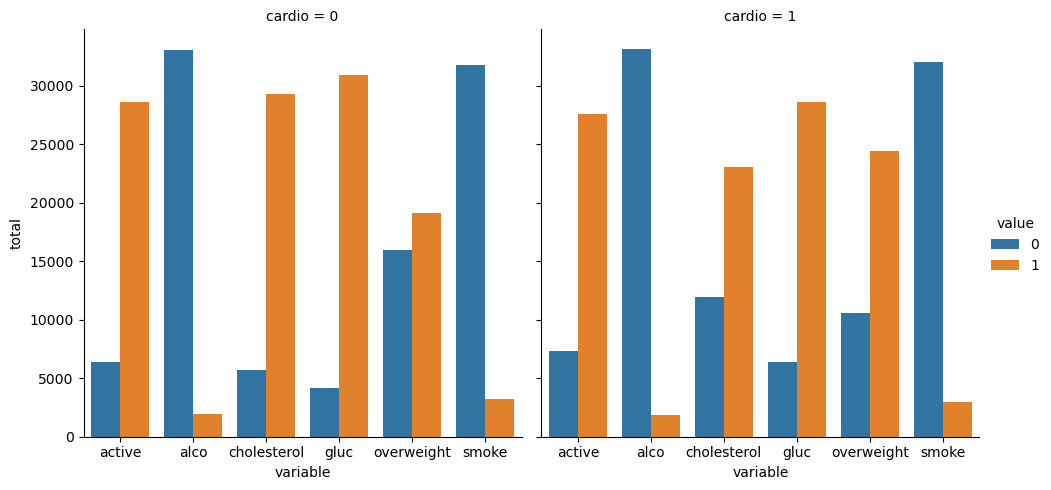

In [32]:
sns.catplot(
    data=df_cat,
    x="variable",
    y="total",
    hue="value",
    col="cardio",
    kind="bar",
    order=value_vars
)

plt.show()

In [38]:
# Clean the data
df_heat = df[
    (df["ap_lo"] <= df["ap_hi"]) &
    (df["height"] >= df["height"].quantile(0.025)) &
    (df["height"] <= df["height"].quantile(0.975)) &
    (df["weight"] >= df["weight"].quantile(0.025)) &
    (df["weight"] <= df["weight"].quantile(0.975)) 
]

df_heat = df_heat.drop(columns=["bmi"])

df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,0,0,0,0,1,1


In [39]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,-0.003719,-0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,-0.129996,-0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,0.037605,0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,0.063522,0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,-0.135981,-0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,-0.022807,-0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,-0.150362,-0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,-0.003719,-0.129996,0.037605,0.063522,-0.135981,-0.022807,-0.150362,1.000000,0.383743,-0.012680,-0.038446,-0.002494,-0.203467,-0.127986
gluc,-0.002289,-0.086990,0.021357,0.030469,-0.107072,-0.011111,-0.074840,0.383743,1.000000,0.004157,-0.014297,0.010145,-0.088445,-0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,-0.012680,0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [40]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

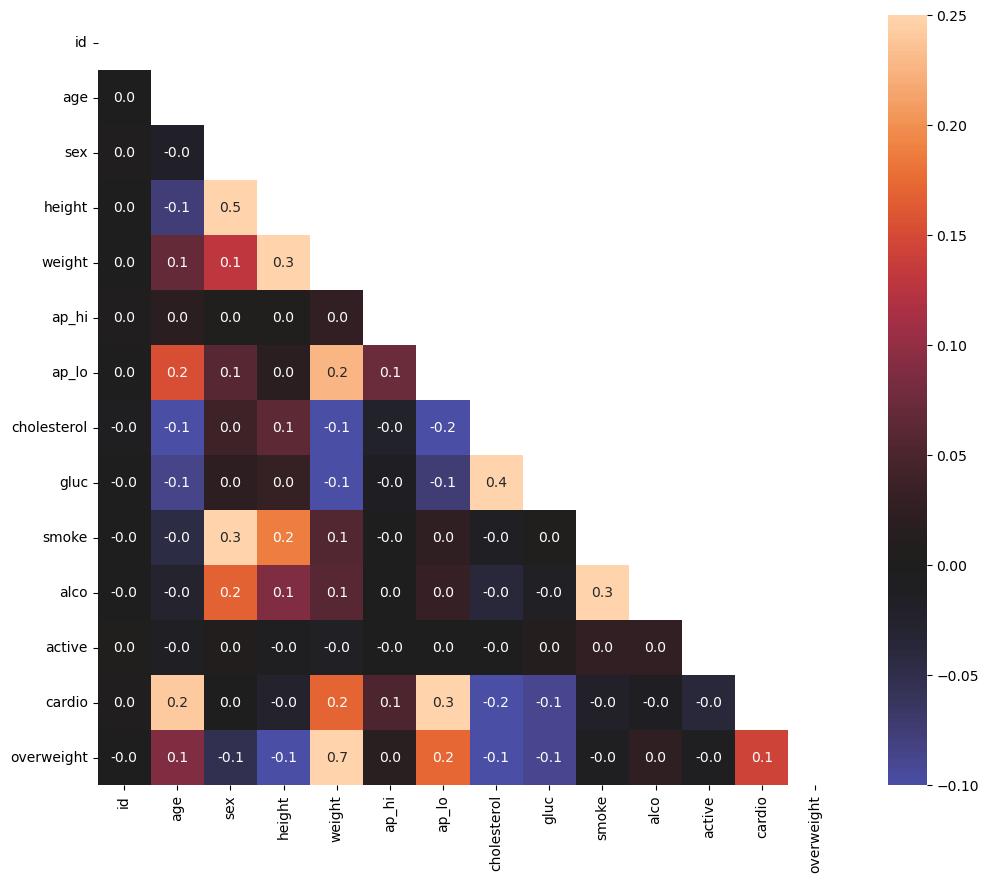

In [51]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(
    data=corr,
    mask=mask,
    annot=True,
    fmt=".1f",
    center=0.0, vmin=-0.1, vmax=0.25
)

plt.show()